### Edgar Moises Hernandez-Gonzalez
#### 16/11/19-19/11/19
#### Clasificar RAW con Conv-LSTM-2D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1, 1, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 1000, 22)
(288, 1, 1, 1000, 22)


In [9]:
model = Sequential()
model.add(ConvLSTM2D(128, (1,7), activation='relu', input_shape=(1,1,1000,22)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 994, 128)       538112    
_________________________________________________________________
dropout (Dropout)            (None, 1, 994, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 127232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8142912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 8,681,284
Trainable params: 8,681,284
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 9s 32ms/sample - loss: 1.7790 - acc: 0.2812 - val_loss: 1.4132 - val_acc: 0.2431
Epoch 2/20
288/288 [==============================] - 14s 47ms/sample - loss: 1.2797 - acc: 0.4653 - val_loss: 1.3857 - val_acc: 0.3125
Epoch 3/20
288/288 [==============================] - 16s 56ms/sample - loss: 1.1016 - acc: 0.6424 - val_loss: 1.4469 - val_acc: 0.2743
Epoch 4/20
288/288 [==============================] - 18s 63ms/sample - loss: 0.8024 - acc: 0.7361 - val_loss: 1.6200 - val_acc: 0.2951
Epoch 5/20
288/288 [==============================] - 18s 63ms/sample - loss: 0.5683 - acc: 0.7917 - val_loss: 1.7476 - val_acc: 0.3507
Epoch 6/20
288/288 [==============================] - 18s 63ms/sample - loss: 0.3191 - acc: 0.8854 - val_loss: 2.2071 - val_acc: 0.3090
Epoch 7/20
288/288 [==============================] - 18s 63ms/sample - loss: 0.2898 - acc: 0.8958 - val_loss: 2.2714 - val_acc: 0.3542
Epo

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 3s 12ms/sample - loss: 3.1649 - acc: 0.3438
Test loss: 3.164940701590644
Test accuracy: 0.34375


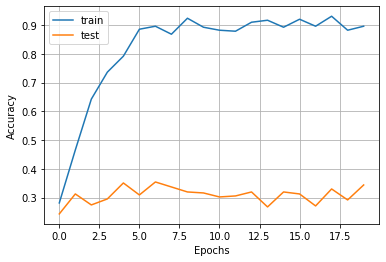

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

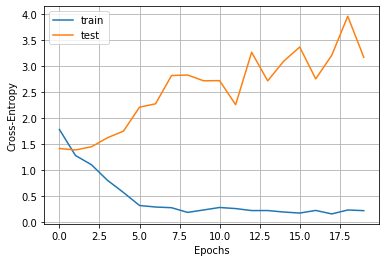

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.125


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[11 41  7 13]
 [11 41  4 16]
 [ 6 28 17 21]
 [ 7 22 13 30]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.31      0.15      0.21        72
           1       0.31      0.57      0.40        72
           2       0.41      0.24      0.30        72
           3       0.38      0.42      0.39        72

   micro avg       0.34      0.34      0.34       288
   macro avg       0.35      0.34      0.33       288
weighted avg       0.35      0.34      0.33       288

